# HW

In [1]:
import numpy as np, matplotlib.pyplot as plt
from scipy.optimize import minimize

from google.colab import drive
drive.mount("/content/drive")
data = np.loadtxt("/content/sample_data/mers.txt")

Mounted at /content/drive


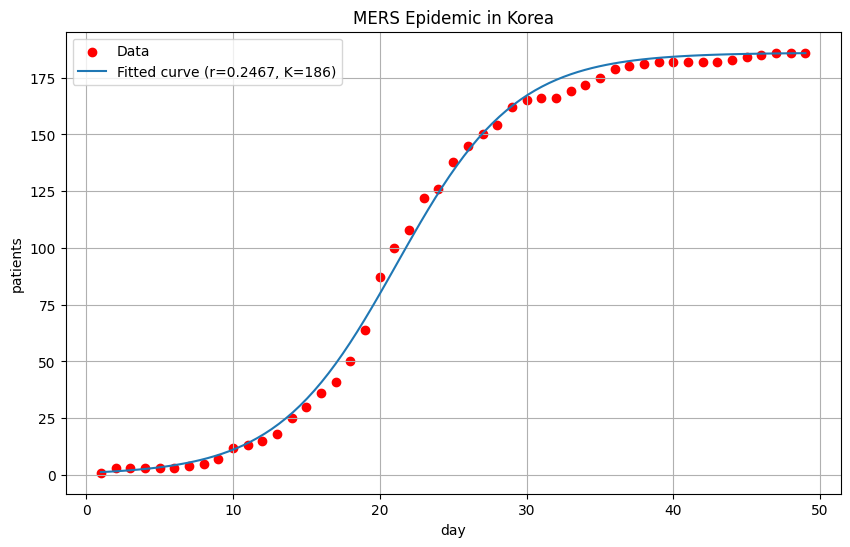

(0.246685351888737, 186.0)

In [5]:
t_data = data[:, 0]
N_data = data[:, 1]

def logistic_growth(t, r, K):
    return K / (1 + ((K - 1) / 1) * np.exp(-r * t))

def loss(params):
    r, K = params
    N_pred = logistic_growth(t_data, r, K)
    return np.sum((N_data - N_pred) ** 2)

initial_guess = [0.1, 200]

result = minimize(loss, initial_guess, method='L-BFGS-B', bounds=[(0, None), (N_data.max(), None)])

r_best, K_best = result.x

t_fit = np.linspace(t_data.min(), t_data.max(), 100)
N_fit = logistic_growth(t_fit, r_best, K_best)

plt.figure(figsize=(10, 6))
plt.scatter(t_data, N_data, color='red', label='Data')
plt.plot(t_fit, N_fit, label=f'Fitted curve (r={r_best:.4f}, K={K_best:.0f})')
plt.xlabel('day')
plt.ylabel('patients')
plt.title('MERS Epidemic in Korea')
plt.legend()
plt.grid(True)
plt.show()
r_best, K_best